# Introduction to Artificial Intelligence (ARTIFIN)

# Lecture 04: Data Clustering

---


# 1. Import Libraries

In [ ]:
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from skimage import io
import time

from sklearn.utils import shuffle
from sklearn.cluster import KMeans

# 2. Load Dataset

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']] # use the annual income and spending scores are variables

Text(0, 0.5, 'Spending Score (1-100)')

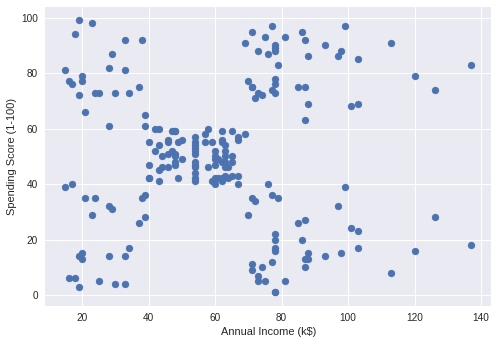

In [ ]:
plt.close()
plt.style.use('seaborn')
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)']) # plot the annual income vs. spending score
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# 3. K-Means parameter search with Elbow Method

In [ ]:
def elbow_method(X, max_k = 10):
  costs = []
  for k in range(2, max_k):
      model = KMeans(n_clusters=k) # initialise a K-means object with "k" clusters
      model.fit(X) # fit your model onto the data X
      costs.append(model.inertia_) # add the models's inertia onto the cost array
  return costs

In [ ]:
max_k = 10
costs = elbow_method(X, max_k)

Text(0, 0.5, 'Cost')

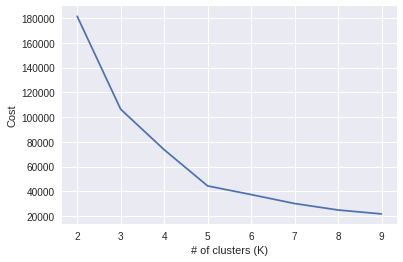

In [ ]:
# plot cost against number of clusters
plt.close()
plt.plot(list(range(2, max_k)), costs)
plt.xlabel("# of clusters (K)")
plt.ylabel("Cost")


# 4. Run K-Means

In [ ]:
model = KMeans(max_iter=500, init = 'k-means++', n_clusters=5, random_state = 123)
kmeans = model.fit(X)

In [ ]:
centers = kmeans.cluster_centers_.squeeze()
labels = kmeans.labels_

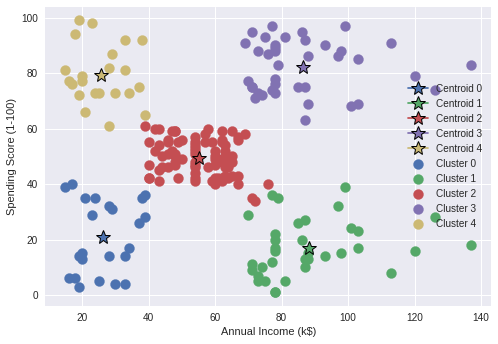

In [ ]:
X_arr = X.iloc[:,[0,1]].values
plt.close()
for i, cluster_mean in enumerate(centers):
    plt.scatter(X_arr[labels == i, 0], X_arr[labels == i, 1], s = 100, label = 'Cluster ' + str(i))
    plt.plot(cluster_mean[0], cluster_mean[1], label = 'Centroid ' + str(i), marker='*', markersize=15, markeredgecolor="k", markeredgewidth=1)
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.style.use('seaborn')
    plt.legend()

# 5. Image compression with K-Means

In [ ]:
def img_quantise(img, n_colors):
  w, h, d = orig_shape = tuple(img.shape)
  assert d == 3
  img_array = np.reshape(img, (w * h, d)) # map img (w,h,d) -> img(w*h, d)
  img_array_sample = shuffle(img_array, random_state=123, n_samples=1_000) # shuffle pixels
  model = KMeans(n_clusters=n_colors, random_state=123) # initialise K-means with "k=n_colors" clusters
  kmeans = model.fit(img_array_sample) # train k-means
  centers = kmeans.cluster_centers_.squeeze() # get cluster centers
  labels = kmeans.predict(img_array) # get data point assignments
  quant_img = centers[labels.flatten()]  # get quantised image 
  quant_img = quant_img.reshape(img.shape) # reshape it to original size
  return quant_img

In [ ]:
img = cv2.imread('sample_data/beach.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img/255
orig_shape = img.shape

In [ ]:
n_colors = 8
qimg = img_quantise(img, n_colors)

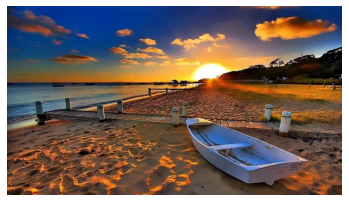

In [ ]:
%matplotlib inline
plt.close()
plt.axis('off')
plt.imshow(img)

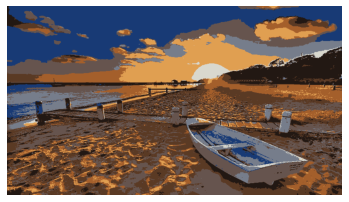

In [ ]:
plt.close()
plt.axis('off')
plt.imshow(qimg)